<a href="https://colab.research.google.com/github/sysiphe0/exercise_ml/blob/main/%5Bstats%5D_anova_%EC%82%AC%ED%9B%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### 출처: https://bongury.tistory.com/456 [봉구리밥스]

In [18]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as mc

datas = load_iris()

In [19]:
cols = [i.replace(' ','.') for i in datas.feature_names] + ['Species']

In [21]:
df = np.hstack((datas.data, datas.target.reshape(-1,1)))

In [22]:
df = pd.DataFrame(df, columns=cols)

In [23]:
df.head()

,sepal.length.(cm),sepal.width.(cm),petal.length.(cm),petal.width.(cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


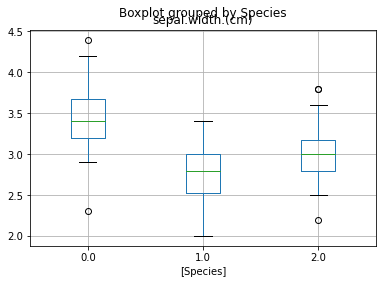

In [24]:
df.boxplot(column=['sepal.width.(cm)'], by=['Species'])

In [26]:
df.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']
fit = ols(formula='SepalWidth ~ C(Species)', data=df).fit()
anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
C(Species),2.0,11.344933,5.672467,49.16004,4.492017e-17
Residual,147.0,16.962000,0.115388,NaN,NaN


## 사후분석

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   0.0    1.0     0.93 0.001 0.6862 1.1738   True
   0.0    2.0    1.582 0.001 1.3382 1.8258   True
   1.0    2.0    0.652 0.001 0.4082 0.8958   True
-------------------------------------------------


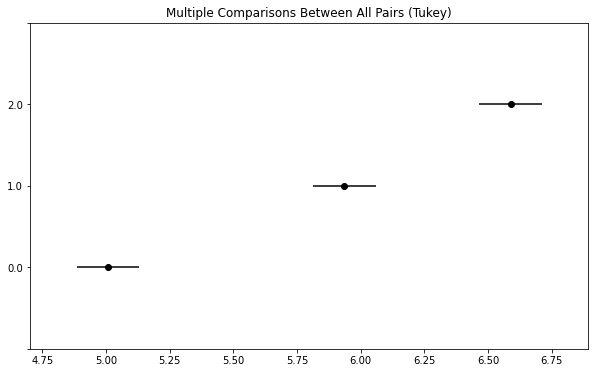

In [28]:
comp = mc.MultiComparison(df['SepalLength'], df['Species'])
tukeyhsd = comp.tukeyhsd(alpha=0.05)
tukeyhsd.summary()
print(tukeyhsd)
fig = tukeyhsd.plot_simultaneous()